# Project 1

In [46]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Objectives
# 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s)
# 2. Check for null and unique values for test and train sets
# 3. Apply label encoder for categorical variables
# 4. Perform dimensaionlity reduction with PCA
# 5. Predict the test_df values using xgboost


# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np 

#import plotting liabrary
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:

# Loading the train/test data
# The lowercase alphabets are categorical variables
location_test = r'test/test.csv'
location_train = r'train/train.csv'

In [3]:
df_train = pd.read_csv(location_train)
print("train data set - rows:", df_train.shape[0], "columns:", df_train.shape[1])

train data set - rows: 4209 columns: 378


In [4]:
df_test = pd.read_csv(location_test)
print("test data set - rows:", df_test.shape[0], "columns:", df_test.shape[1])

test data set - rows: 4209 columns: 377


In [5]:
df_train.sample(5) # 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2304,4609,100.95,aj,s,as,c,d,k,i,v,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1361,2695,91.24,al,o,ai,f,d,ac,g,p,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4019,8060,74.75,az,w,n,f,d,w,k,j,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

In [6]:
df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [7]:
df_train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']].sample(10)

,X0,X1,X2,X3,X4,X5,X6,X8
1819,al,o,ai,f,d,ae,g,p
2876,z,b,ai,a,d,p,d,i
375,j,aa,ai,c,d,d,l,a
3257,e,u,ak,c,d,s,i,v
1643,ap,k,s,c,d,ad,h,c
1948,w,c,as,c,d,ah,d,a
1193,aj,a,as,e,d,ab,g,a
3127,y,r,f,f,d,q,j,s
727,o,l,ae,f,d,af,g,b
1266,m,n,as,f,d,ab,j,m


In [8]:
df_train[df_train.columns[10:]].sample(10) 

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1336,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2351,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3507,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
713,0,0,0,1,1,0,0,0,0,0,

In [9]:
np.unique(df_train[df_train.columns[10:]])

array([0, 1], dtype=int64)

In [10]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [11]:
NAs = pd.concat([df_train.isnull().sum()], axis=1, keys=['Count of NANs'])
NAs.sample(10)

,Count of NANs
X211,0
X306,0
X254,0
X116,0
X122,0
X278,0
X240,0
X266,0
X60,0
X379,0


In [12]:
NAs[NAs.sum(axis=1) > 0]

,Count of NANs


In [13]:
df_train['y'].describe() # 2. Check for null and unique values for test and train sets

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [14]:
from statsmodels.graphics.gofplots import qqplot

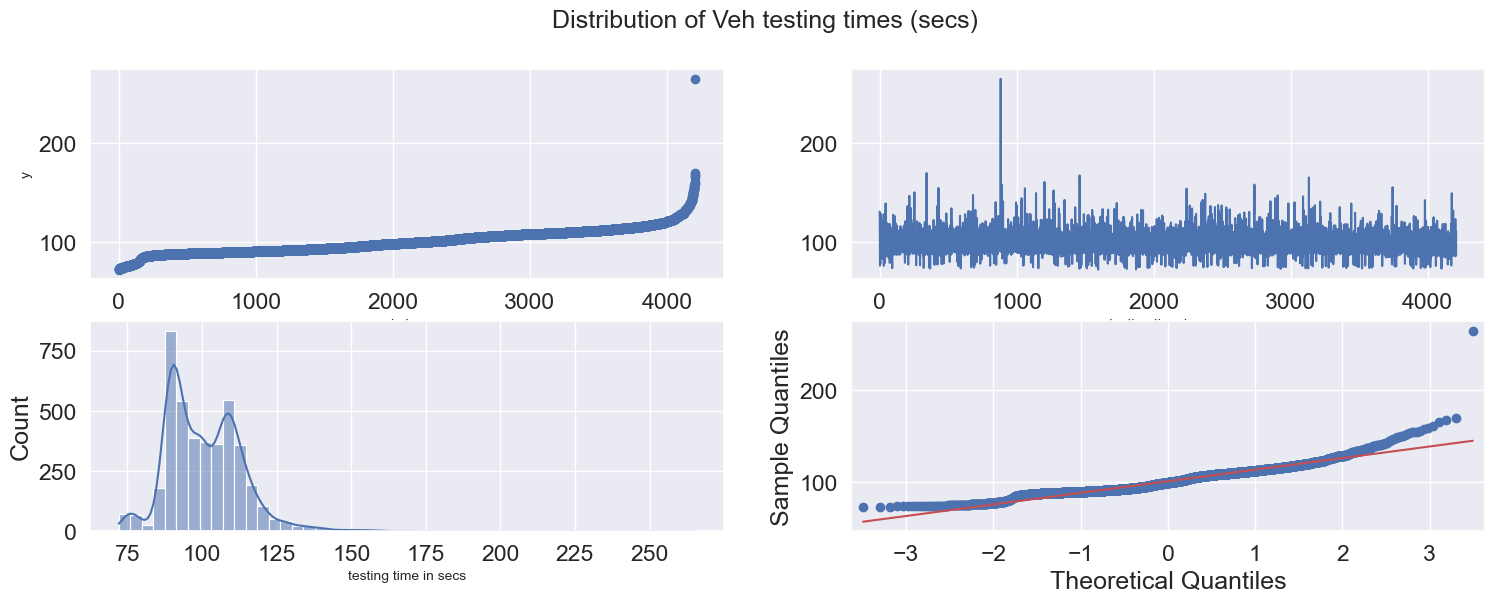

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 6))
fig.suptitle ('Distribution of Veh testing times (secs)', fontsize=18)
 
ax1.scatter(range(df_train.shape[0]), np.sort(df_train.y.values)) 
ax1.set_xlabel('index', fontsize =10)
ax1.set_ylabel('y', fontsize =10)

ax2.plot(df_train['y']);
ax2.set_xlabel('testing time in secs', fontsize = 10)

sns.histplot(df_train.y.values, bins=50, kde=True, ax=ax3)
ax3.set_xlabel('testing time in secs', fontsize=10)

qqplot(df_train['y'], line='s', ax=ax4);

In [16]:
from scipy.stats import shapiro 
from scipy.stats import normaltest
from scipy.stats import anderson

In [17]:
#normality testing 
stat, p = shapiro(df_train['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.5
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not looks Gaussian (reject H0)')

Statistics=0.939, p=0.000
Sample does not looks Gaussian (reject H0)


In [18]:
#normality test 
stat, p = normaltest(df_train['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.5
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not looks Gaussian (reject H0)')

Statistics=1302.013, p=0.000
Sample does not looks Gaussian (reject H0)


In [19]:
#normality test
result = anderson(df_train['y']) 
p=0
print('{:15s} {:15s} {:15s}'.format('Significance Level', 'Teat Statistic', 'Critical Value'))
print('{:15s} {:15s} {:15s}'.format('------------------', '--------------', '--------------'))
for i in range(len(result.critical_values)):
    s1, cv = result.significance_level[i], result.critical_values[i]
    
    if result.statistic < result.critical_values[i]:
        print('{:17d}% {:14.3f} {:16.3f} Test stats < CV, (fail to reject H0)'.format(int(s1), result.statistic, cv))
    else:
        print('{:17d}% {:14.3f} {:16.3f} Test stats >= CV, (reject H0)'.format(int(s1), result.statistic, cv))

Significance Level Teat Statistic  Critical Value 
------------------ --------------  -------------- 
               15%         43.248            0.575 Test stats >= CV, (reject H0)
               10%         43.248            0.655 Test stats >= CV, (reject H0)
                5%         43.248            0.786 Test stats >= CV, (reject H0)
                2%         43.248            0.917 Test stats >= CV, (reject H0)
                1%         43.248            1.091 Test stats >= CV, (reject H0)


In [20]:
dtype_df = df_train.dtypes.reset_index()
dtype_df.sample(10) # 2. Check for null and unique values for test and train sets

,index,0
66,X67,int64
123,X126,int64
149,X153,int64
334,X341,int64
89,X91,int64
53,X54,int64
304,X311,int64
95,X97,int64
214,X220,int64
183,X187,int64


In [21]:
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head(3) # 2. Check for null and unique values for test and train sets

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object


In [22]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [23]:
# possible data types # 2. Check for null and unique values for test and train sets
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['O']

In [24]:
df_train_num = df_train.select_dtypes(include=numerics) # 2. Check for null and unique values for test and train sets
df_train_cat = df_train.select_dtypes(include=objects)

In [25]:
print(df_train_cat.columns)
print(df_train_num.columns) # 2. Check for null and unique values for test and train sets

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


In [26]:
#for each cat column, display the distinct values
for col_name in df_train_cat.columns:
    print('The unique values in '+col_name+' are: ', df_train_cat[col_name].nunique())
    
    print(df_train_cat[col_name].unique())

The unique values in X0 are:  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
The unique values in X1 are:  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
The unique values in X2 are:  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
The unique values in X3 are:  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
The unique values in X4 are:  4
['d' 'b' 'c' 'a']
The unique values in X5 are:  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
The unique values in X6 are:  12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
The unique values 

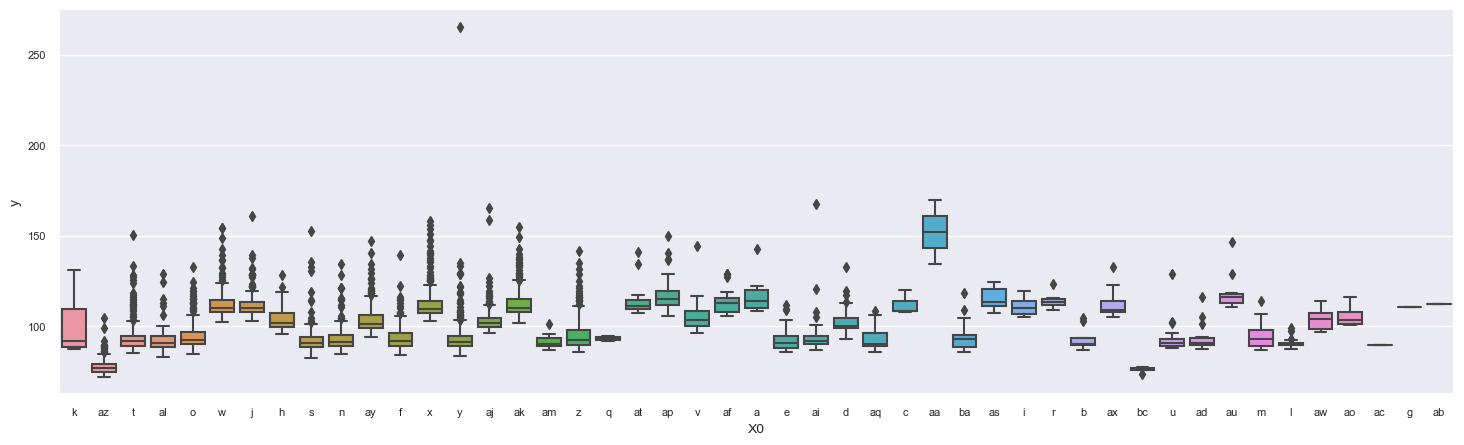

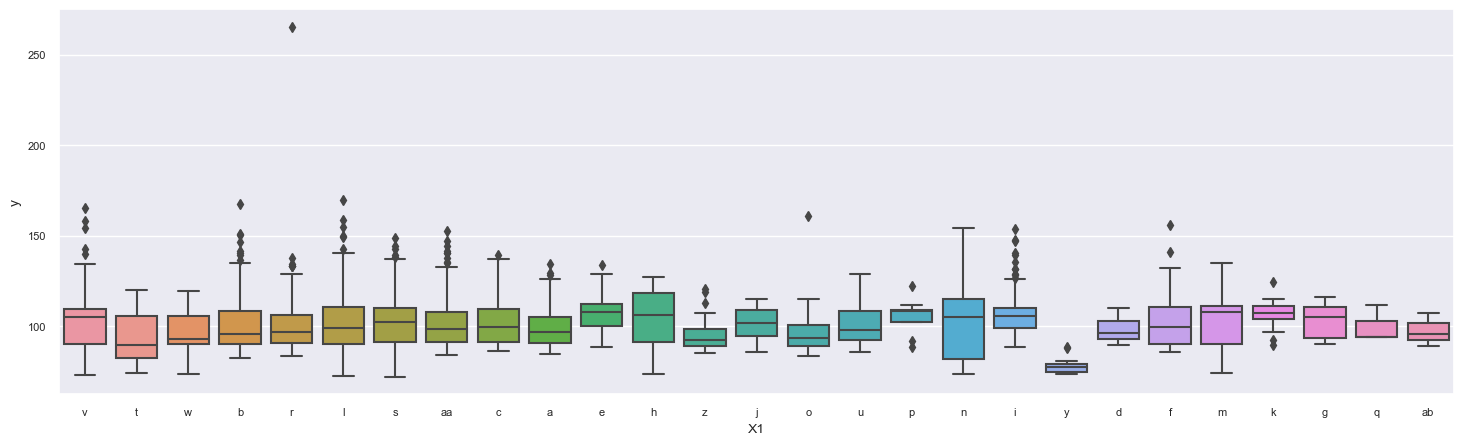

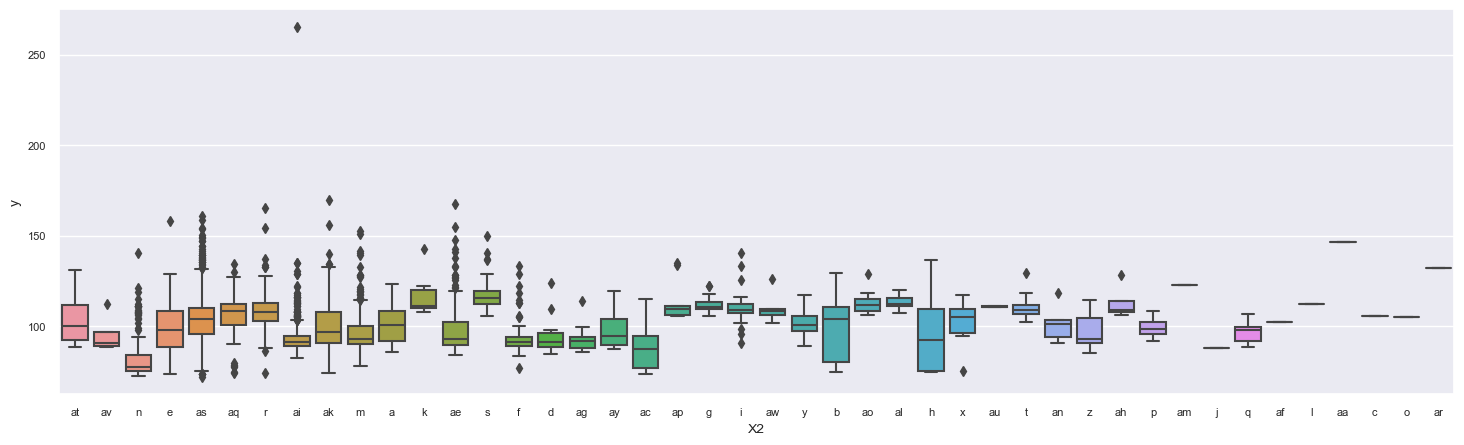

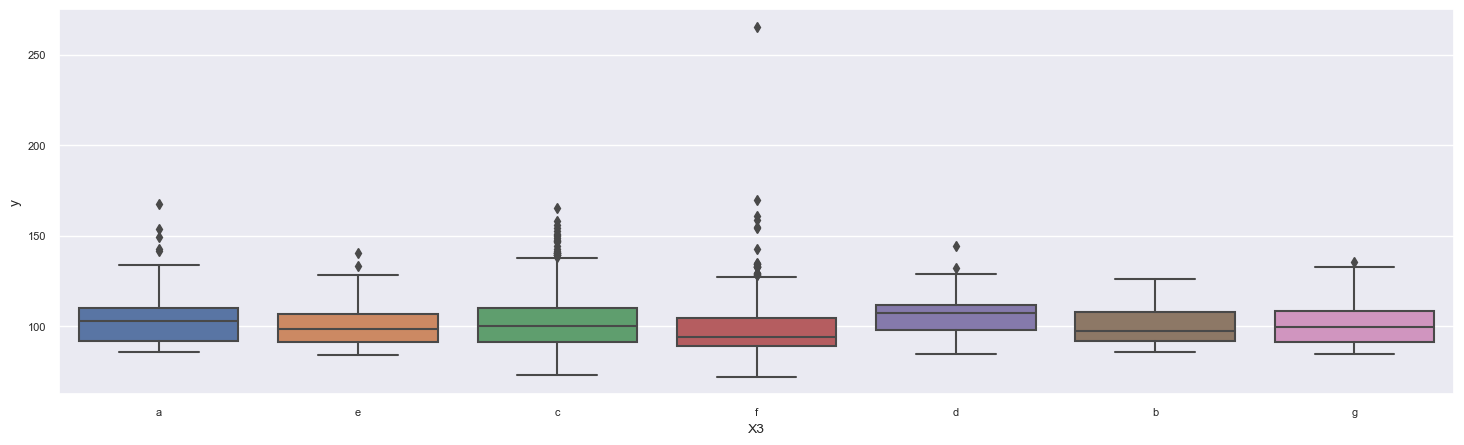

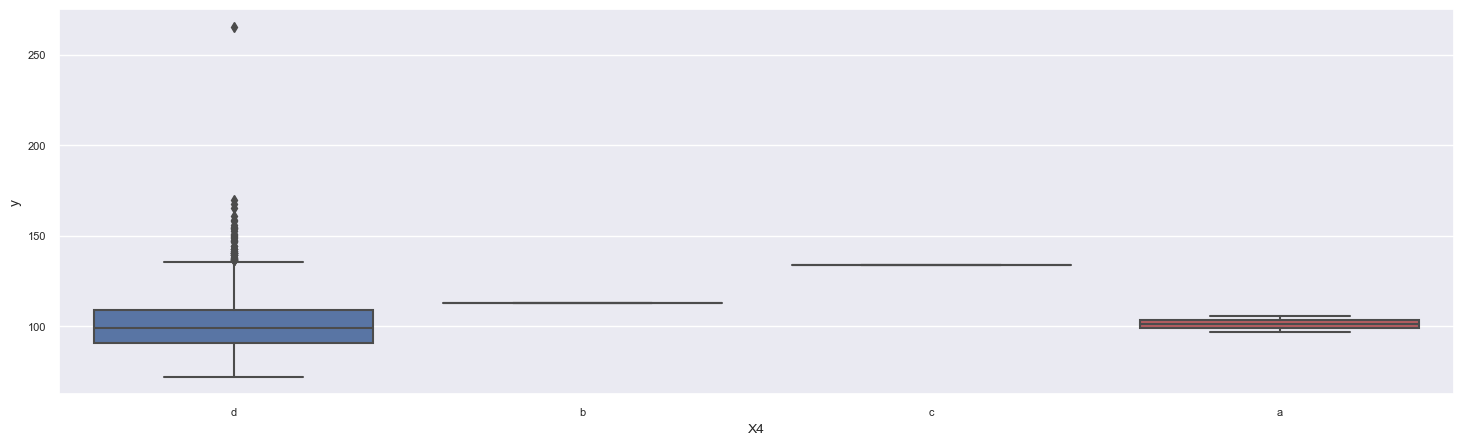

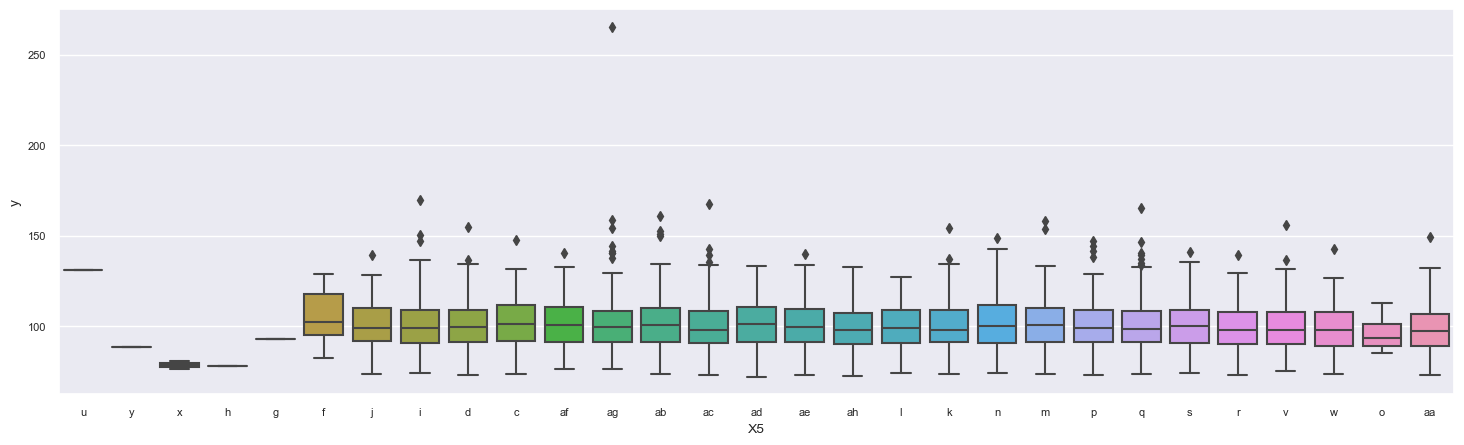

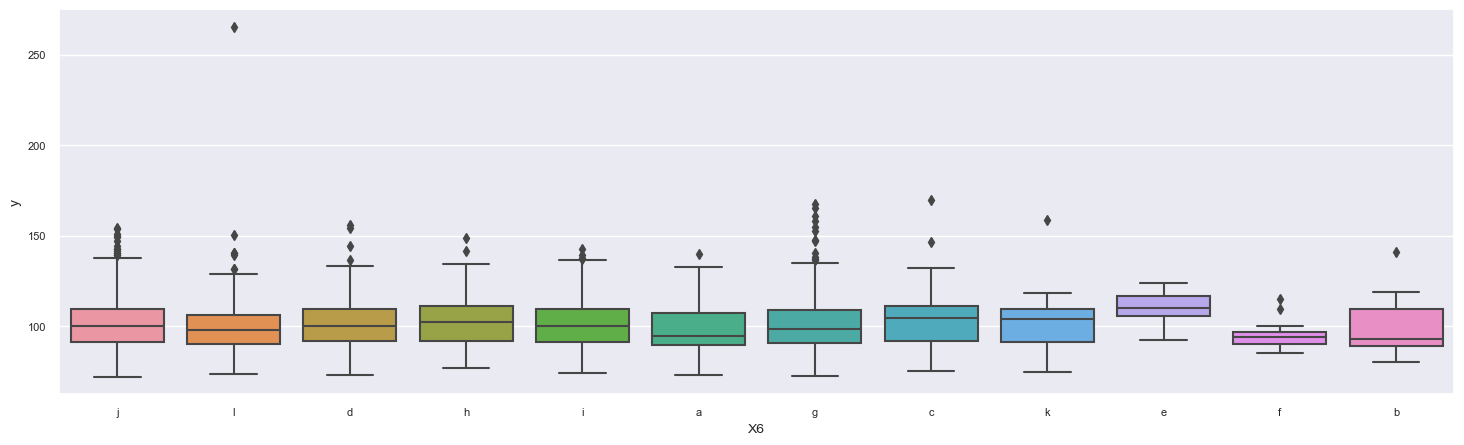

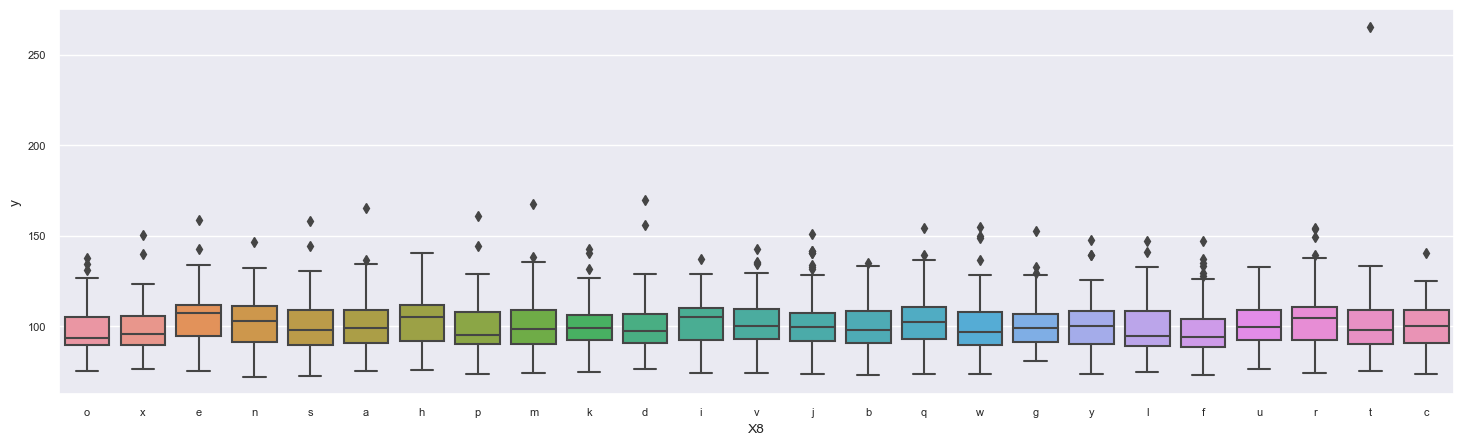

In [27]:
 #vslue of y change for each of X0, X1.....
cols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in cols:
    plt.figure(figsize=(18, 5))
    
    sns.boxplot(x=col, y='y', data=df_train)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

In [28]:
import statsmodels.api as sn
from statsmodels.formula.api import ols

In [29]:
model = ols('y ~ C(X4)', data = df_train).fit() # 2. Check for null and unique values for test and train sets

In [30]:
print('F-statistics : ', model.fvalue) # 2. Check for null and unique values for test and train sets
print('p-value      : ', model.f_pvalue)

F-statistics :  2.6188965213725144
p-value      :  0.04920919630464415


In [31]:
anova_table = sn.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(X4),1261.638003,3.0,2.618897,0.049209
Residual,675244.676340,4205.0,NaN,NaN


In [32]:
#Load packages # 2. Check for null and unique values for test and train sets
from statsmodels.stats.multicomp import pairwise_tukeyhsd
colname = 'X4'

#perform multiple pairwise Comparison(Turkey HSO)
m_comp = pairwise_tukeyhsd(endog = df_train['y'], groups=df_train[colname], alpha=0.5)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     a      b     11.7  0.875 -10.0125  33.4125  False
     a      c    32.94 0.1461  11.2275  54.6525   True
     a      d  -0.4417    1.0 -12.9804   12.097  False
     b      c    21.24 0.6363  -3.8315  46.3115  False
     b      d -12.1417 0.7733  -29.872   5.5886  False
     c      d -33.3817 0.0421  -51.112 -15.6514   True
------------------------------------------------------


In [33]:
df_train[df_train.X4 == 'c'] # 2. Check for null and unique values for test and train sets

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1308,2584,134.04,ak,e,ap,c,c,ac,j,j,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
df_train[df_train.X4 == 'd'] # 2. Check for null and unique values for test and train sets

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [35]:
df_train.X4.value_counts() # 2. Check for null and unique values for test and train sets

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [36]:
#Value of y change for each of X0, X1.... # 2. Check for null and unique values for test and train sets
cols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in  cols:
    print(col, '\n', df_train[col].value_counts())

X0 
 z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64
X1 
 aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
X2 
 as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
a

In [37]:
# run ANOVA for all the categorical columns
colnames = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8' ]
for colname in colnames:
    model = ols('y ~ '+colname, data=df_train).fit()
    
    print('Column : {}, F-statistic : {:6.2f}, p-value : {:6.2f}'.format(colname, model.fvalue, model.f_pvalue))

Column : X0, F-statistic : 122.31, p-value :   0.00
Column : X1, F-statistic :   6.99, p-value :   0.00
Column : X2, F-statistic :  28.26, p-value :   0.00
Column : X3, F-statistic :  30.99, p-value :   0.00
Column : X4, F-statistic :   2.62, p-value :   0.05
Column : X5, F-statistic :   2.15, p-value :   0.00
Column : X6, F-statistic :   4.18, p-value :   0.00
Column : X8, F-statistic :   5.03, p-value :   0.00


In [38]:
df_train.columns # 2. Check for null and unique values for test and train sets

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [48]:
y_train = df_train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [49]:
final_column = list(set(df_train.columns)- set(['ID', 'y']))

X_test = df_test[final_column] # 2. Check for null and unique values for test and train sets
X_train = df_train[final_column]

In [50]:
def detect(df): # 2. Check for null and unique values for test and train sets
    if df.isnull().any().any():
        print("Yes")
    else:
        print("No")
        
detect(X_test)
detect(X_train)

No
No


In [51]:
# 3. Apply label encoder for categorical variables
# Removal of columns with a variance of 0
# Column with a variance of 1 is irrelevant so we drop it
for column in final_column:
    check = len(np.unique(X_train[column]))
    if check == 1:
        X_train.drop(column, axis = 1) 
        X_test.drop(column, axis = 1)
    if check > 2: # Column is categorical; hence mapping to ordinal measure of value
        mapit = lambda x: sum([ord(digit) for digit in x])
        X_train[column] = X_train[column].apply(mapit)
        X_test[column] = X_test[column].apply(mapit)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18196\3863800696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = X_train[column].apply(mapit)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18196\3863800696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = X_test[column].apply(mapit)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18196\3863800696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [52]:
X_train.head()

,X14,X278,X44,X270,X306,X374,X352,X13,X179,X282,X80,X73,X222,X321,X322,X235,X302,X47,X220,X217,X333,X163,X257,X81,X301,X8,X367,X99,X380,X300,X79,X109,X228,X218,X31,X21,X50,X174,X181,X151,X350,X156,X105,X259,X32,X293,X332,X158,X268,X5,X16,X304,X385,X46,X253,X87,X315,X40,X348,X78,X68,X71,X114,X213,X26,X212,X19,X258,X36,X383,X58,X328,X146,X126,X135,X368,X55,X171,X223,X214,X283,X342,X93,X271,X125,X236,X139,X364,X248,X206,X326,X169,X297,X243,X164,X145,X97,X144,X244,X198,X227,X130,X120,X323,X85,X113,X291,X86,X262,X166,X373,X90,X196,X204,X377,X186,X266,X12,X49,X178,X59,X224,X18,X226,X42,X95,X103,X233,X28,X265,X260,X54,X372,X353,X74,X359,X275,X363,X38,X298,X366,X56,X133,X316,X346,X358,X51,X369,X69,X27,X261,X77,X344,X307,X242,X221,X267,X281,X104,X370,X285,X357,X327,X277,X10,X349,X91,X140,X299,X319,X290,X65,X240,X17,X82,X48,X41,X183,X361,X176,X219,X197,X250,X272,X325,X314,X311,X199,X256,X356,X225,X118,X286,X57,X209,X194,X128,X336,X273,X320,X116,X351,X371,X64,X338,X161,X330,X365,X107,X142,X131,X184,X170,X153,X89,X234,X148,X280,X232,X22,X112,X294,X37,X249,X345,X62,X165,X334,X384,X296,X255,X287,X279,X102,X274,X317,X39,X331,X83,X63,X159,X237,X67,X187,X309,X143,X20,X61,X154,X339,X382,X335,X355,X230,X152,X195,X1,X288,X229,X192,X155,X324,X157,X354,X264,X52,X160,X6,X43,X341,X84,X284,X263,X241,X292,X45,X119,X378,X203,X66,X245,X310,X177,X190,X24,X129,X115,X329,X207,X168,X111,X231,X376,X208,X252,X33,X2,X138,X210,X53,X337,X211,X136,X308,X254,X141,X108,X132,X147,X123,X96,X127,X29,X167,X202,X295,X106,X189,X239,X180,X122,X215,X318,X110,X94,X0,X15,X34,X172,X3,X75,X200,X205,X137,X70,X216,X251,X313,X340,X191,X182,X289,X101,X175,X238,X4,X92,X246,X150,X347,X247,X162,X98,X276,X134,X60,X23,X30,X379,X100,X269,X312,X360,X124,X35,X343,X173,X362,X375,X201,X88,X76,X117,X185,X11,X305
0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,111,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,117,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,118,0,0,0,0,1,0,1,0,0,0,106,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,213,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,107,0,0,0,97,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,121,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,116,0,1,0,0,0,0,0,0,0,0,108,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,215,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,107,0,0,0,101,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,100,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,120,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,120,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,119,0,0,0,0,1,1,1,0,0,0,106,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,110,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,219,0,0,0,99,1,0,1,1,1

In [53]:
# 4. Perform dimensaionlity reduction with PCA
# Performing dimensionality reduction with principal components analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 42)
pca_result_train = pca.fit_transform(X_train)
pca_result_test = pca.transform(X_test)
# print(pca_result_train)
# print(pca_result_test) 

In [54]:
# ML Modeling with XGboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data by 80/20
x_train, x_valid, y_train, y_valid = train_test_split(pca_result_train, y_train, test_size = 0.2, random_state = 42)

In [55]:
# Building the final feature set
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)
f_test = xgb.DMatrix(X_test)
f_test = xgb.DMatrix(pca_result_test)

In [56]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

In [58]:
# 5. Predict the test_df values using xgboost
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 500, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)

[18:00:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99696	train-r2:-59.49733	valid-rmse:98.88884	valid-r2:-61.82690
[10]	train-rmse:81.14409	train-r2:-39.64492	valid-rmse:81.07847	valid-r2:-41.23399
[20]	train-rmse:66.59753	train-r2:-26.37844	valid-rmse:66.55611	valid-r2:-27.45948
[30]	train-rmse:54.75786	train-r2:-17.50911	valid-rmse:54.73483	valid-r2:-18.24769
[40]	train-rmse:45.13933	train-r2:-11.57774	valid-rmse:45.13600	valid-r2:-12.08872


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:568: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\training.py:35: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[50]	train-rmse:37.34556	train-r2:-7.60935	valid-rmse:37.36245	valid-r2:-7.96854
[60]	train-rmse:31.05135	train-r2:-4.95187	valid-rmse:31.08692	valid-r2:-5.20878
[70]	train-rmse:25.98889	train-r2:-3.16935	valid-rmse:26.04135	valid-r2:-3.35690
[80]	train-rmse:21.94789	train-r2:-1.97357	valid-rmse:22.00815	valid-r2:-2.11185
[90]	train-rmse:18.74995	train-r2:-1.17016	valid-rmse:18.82595	valid-r2:-1.27701
[100]	train-rmse:16.24056	train-r2:-0.62815	valid-rmse:16.34618	valid-r2:-0.71666
[110]	train-rmse:14.29741	train-r2:-0.26185	valid-rmse:14.43423	valid-r2:-0.33856
[120]	train-rmse:12.82171	train-r2:-0.01481	valid-rmse:12.98656	valid-r2:-0.08353
[130]	train-rmse:11.70794	train-r2:0.15384	valid-rmse:11.90431	valid-r2:0.08954
[140]	train-rmse:10.86813	train-r2:0.27087	valid-rmse:11.11618	valid-r2:0.20611
[150]	train-rmse:10.24841	train-r2:0.35166	valid-rmse:10.54866	valid-r2:0.28510
[160]	train-rmse:9.79874	train-r2:0.40730	valid-rmse:10.15115	valid-r2:0.33796
[170]	train-rmse:9.46616	train

In [59]:
# Predicting on test set # 5. Predict the test_df values using xgboost
p_test = P.predict(f_test)
p_test

array([ 79.08027 ,  96.089   ,  81.389435, ...,  98.831856, 106.9218  ,
        95.370346], dtype=float32)

In [60]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,79.080269
1,96.088997
2,81.389435
3,77.296570
4,109.561272
